# **Data Science - Assignment 3**
# Ather Fawaz [17L-4004]
# Muhammad Wasiq [17L-6315] 

In [31]:
import sklearn
from sklearn import datasets
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold

# Preparing the Iris Fisher Dataset
K-Fold Cross Validation: k=5 

Test Set: 30 Samples

Cross-Val Set: 20 Samples

Train Set: 100 Samples

In [34]:
# Iris Fisher Dataset

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

np.random.seed(42)
indices = np.random.permutation(len(iris_X))

# test set
iris_X_test = iris_X[indices[-30:]]
iris_y_test = iris_y[indices[-30:]]


# train/val set
iris_X = iris_X[indices[:-30]]
iris_y = iris_y[indices[:-30]]

folds = 5
k_folder = KFold(n_splits=folds)
k_folder.get_n_splits(iris_X)


5

# Experiment #1: Control
SVM Classifier: Linear

No k-fold Cross Validation

Value of C: 1.0 (Default)

**Results**

Train Accuracy: 98.33%

Test Accuracy: 96.67%

In [36]:
# SVM Linear Classifier

svc = svm.SVC(kernel="linear")
svc.fit(iris_X, iris_y)

predictions = svc.predict(iris_X)
acc = sklearn.metrics.accuracy_score(iris_y, predictions)
print(f"Train Accuracy: {acc*100:.2f}%")

predictions = svc.predict(iris_X_test)
acc = sklearn.metrics.accuracy_score(iris_y_test, predictions)
print(f"Test Accuracy: {acc*100:.2f}%")

Train Accuracy: 98.33%
Test Accuracy: 96.67%


# Experiment #2: Optimised Hyperparameters for Linear SVM
5 fold Cross Validation

Optimal Value of C: 0.79

**Results**

Train Accuracy: 99.17%

Test Accuracy: 96.67%

In [18]:
# Optimal value of C for linear SVM

_range = [i/100 for i in range(1,100)]

max_acc = 0
optim_c = 0
for c in _range:
  avg_acc = 0
  for train_index, test_index in k_folder.split(iris_X):
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_y[train_index], iris_y[test_index]

    svc = svm.SVC(C=c, kernel="linear")
    svc.fit(X_train, y_train)

    predictions = svc.predict(X_test)
    acc = sklearn.metrics.accuracy_score(y_test, predictions)
    avg_acc += acc

  avg_acc = avg_acc/folds
  if  avg_acc > max_acc:
    max_acc = avg_acc
    optim_c = c

print(f"Value of C: {optim_c}  \nAccuracy: {max_acc*100:.2f}%")


Value of C: 0.79  
Accuracy: 99.17%


In [19]:
# Testing Linear SVM using optimal hyperparamters
predictions = svc.predict(iris_X_test)

acc = sklearn.metrics.accuracy_score(iris_y_test, predictions)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 96.67%


# Experiment #3: Optimised Hyperparameters for RBF SVM
5 fold Cross Validation

Optimal Value of C: 0.97

Optimal Value of gamma: 0.24

**Results**

Train Accuracy: 98.33%

Test Accuracy: 96.67%

In [20]:
# Optimal value of C and gamma for non-linear SVM

C_range = [i/100 for i in range(1,100)]
gamma_range = [i/100 for i in range(1,100)]
max_acc = 0
optim_c = 0
optim_gamma = 0


for Gamma in gamma_range:
    for c in C_range:
        avg_acc = 0
        for train_index, test_index in k_folder.split(iris_X):
            X_train, X_test = iris_X[train_index], iris_X[test_index]
            y_train, y_test = iris_y[train_index], iris_y[test_index]

            svc = svm.SVC(C=c, gamma=Gamma, kernel="rbf")
            svc.fit(X_train, y_train)

            predictions = svc.predict(X_test)
            acc = sklearn.metrics.accuracy_score(y_test, predictions)
            avg_acc += acc

        avg_acc = avg_acc/folds
        if  avg_acc > max_acc:
            max_acc = avg_acc
            optim_c = c
            optim_gamma = Gamma

print(f"Optimal Value of C: {optim_c} \nOptimal Value of Gamma: {optim_gamma}  \nAccuracy: {max_acc*100:.2f}%")



Optimal Value of C: 0.97 
Optimal Value of Gamma: 0.24  
Accuracy: 98.33%


In [21]:
# Testing rbf SVM using optimal hyperparamters
predictions = svc.predict(iris_X_test)

acc = sklearn.metrics.accuracy_score(iris_y_test, predictions)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 96.67%


# Visualization 

Reducing Dataset to 2 features only.

Using Optimal Hyperparameters found in previous section.

In [22]:
# Visualization 

%matplotlib inline
import matplotlib.pyplot as plt
def plot_contours(ax, clf, xx, yy, **params):
  """Plot the decision boundaries for a classifier.
  Parameters
  ----------
  ax: matplotlib axes object
  clf: a classifier
  xx: meshgrid ndarray
  yy: meshgrid ndarray
  params: dictionary of params to pass to contourf, optional
  """
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  return xx, yy




In [25]:
# Reducing Dataset to 2 features to help Visualization
iris_X = iris_X[:, :2]
iris_X_test = iris_X_test[:, :2]


Train Accuracy: 83.33%


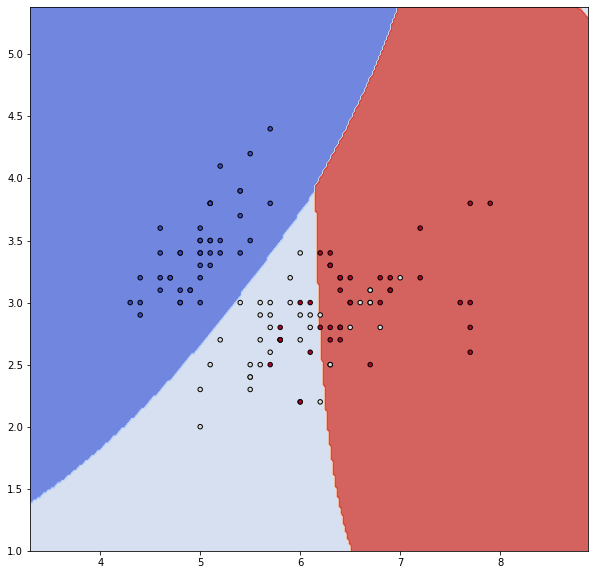

In [29]:
# Visualization 
svc = svm.SVC(kernel='rbf', gamma=optim_gamma, C=optim_c)
pred = svc.fit(iris_X, iris_y)
pred = svc.predict(iris_X)
train_acc = sklearn.metrics.accuracy_score(iris_y, pred)
print(f"Train Accuracy: {train_acc*100:.2f}%")

U, V = iris_X[:, 0], iris_X[:, 1]
xx, yy = make_meshgrid(U, V)
figsize = 10
fig = plt.figure(figsize=(figsize,figsize))
ax = plt.subplot(111)
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(U, V, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())

ax.set_ylim(yy.min(), yy.max())
plt.show()